# Clustering - Data Analysis

In [ ]:
Importando Libreria y Lyendo el Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'recipe_site_traffic_2212.csv'

try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: '{file_path}' no encontrado. Asegúrate de que el archivo esté en la ruta correcta.")
    data = pd.DataFrame()

if not data.empty:
    print("Primeras 5 filas del DataFrame:")
    print(data.head())

    print("\nInformación del DataFrame:")
    data.info()

    print("\nEstadísticas descriptivas para columnas numéricas:")
    print(data.describe())

    print(f"\nEl DataFrame tiene {data.shape[0]} filas y {data.shape[1]} columnas.")
else:
    print("El DataFrame está vacío. No se puede realizar el análisis inicial.")

    print("Distribución inicial de 'high_traffic' (incluyendo NaNs):")
print(data['high_traffic'].value_counts(dropna=False))



Primeras 5 filas del DataFrame:
   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    fl

## Análisis Univariado de Datos

Hacemo un analisis Univariado de los datos para entenderlos mejor, aunque no se aun paos obligatorio, siempre es bueno hacerlo para comprender  cada variable de forma individual, identificar patrones, valores faltantes, valores atípicos y guiar las decisiones de preprocesamiento, lo que, a su vez, mejora la calidad de los modelos de clustering.

Iniciando Análisis Univariado Numérico...


/app/ArtificialIntelligence/ArtificialIntelligence/Tarea/Tarea 2/Tasty Bytes/data_analysis.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[i], shade=True)
/app/ArtificialIntelligence/ArtificialIntelligence/Tarea/Tarea 2/Tasty Bytes/data_analysis.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[i], shade=True)
/app/ArtificialIntelligence/ArtificialIntelligence/Tarea/Tarea 2/Tasty Bytes/data_analysis.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[i], shade=True)
/app/ArtificialIntelligence/ArtificialIntelligence/Tarea/Tarea 2/Tasty Bytes/data_analysis.py:37: FutureWarning: 

`shade` is n

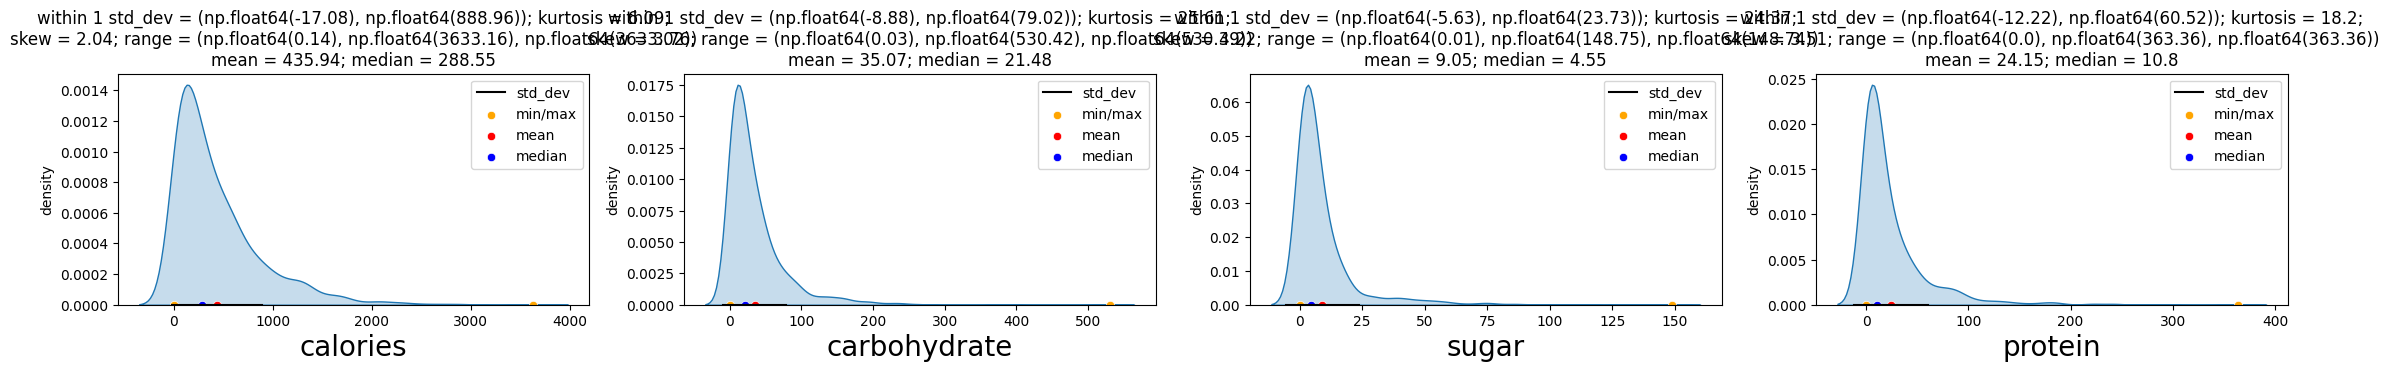


Iniciando Análisis Univariado Categórico...


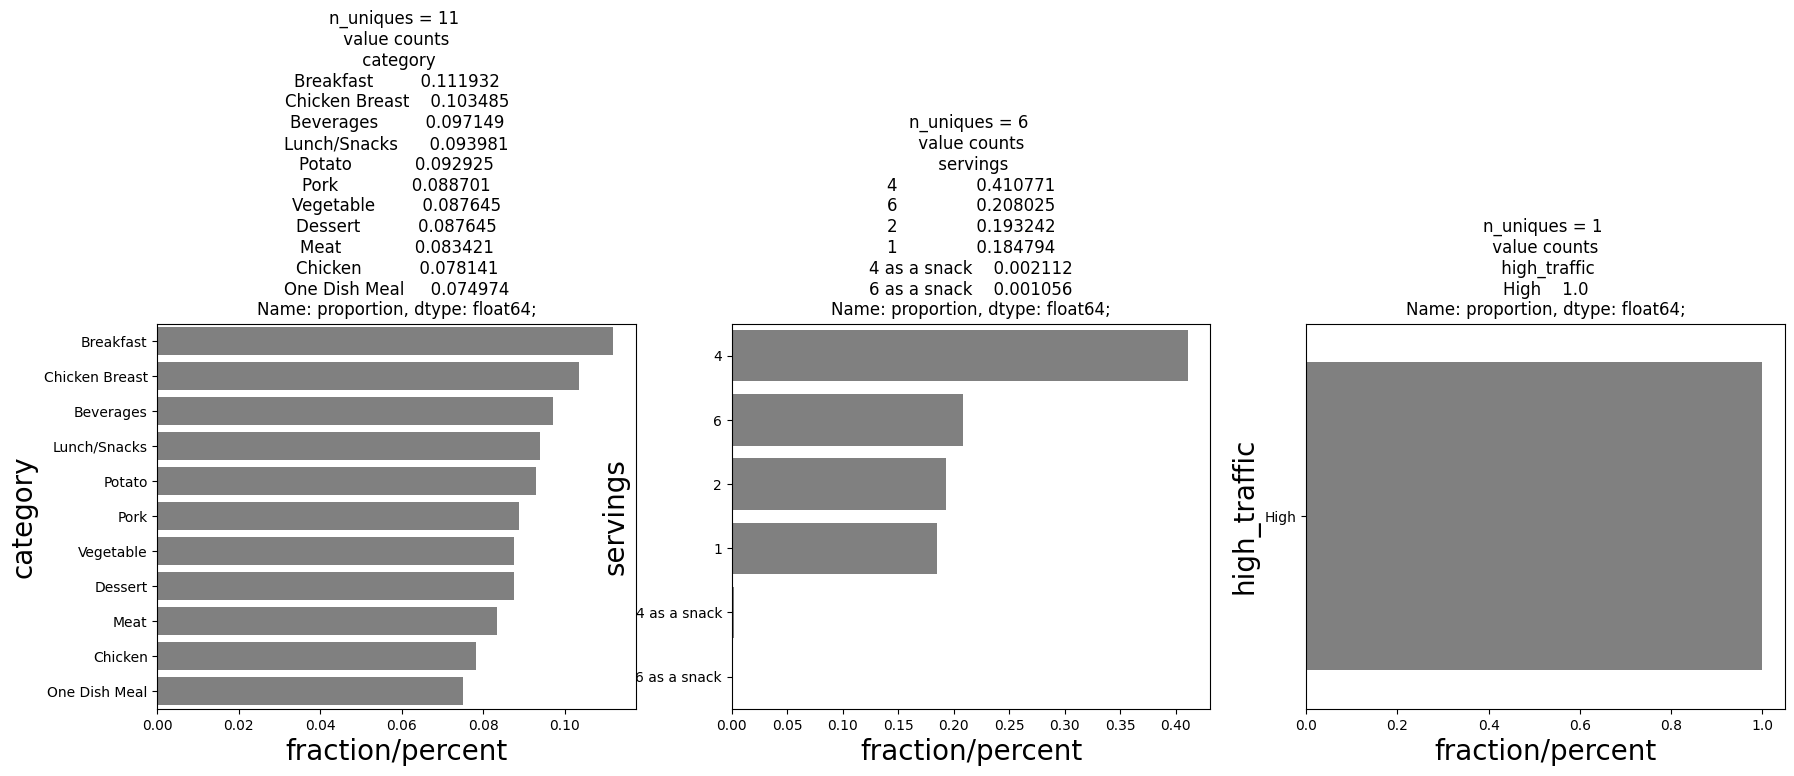

In [4]:
import sys
sys.path.append('.') 
from data_analysis import UVA_numeric, UVA_category

numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
categorical_cols = ['category', 'servings', 'high_traffic']

print("Iniciando Análisis Univariado Numérico...")
UVA_numeric(data, numerical_cols)
plt.show() 

print("\nIniciando Análisis Univariado Categórico...")

UVA_category(data, categorical_cols)
plt.show() 

Del analisis y graficas podemos ver 

-Valores Faltantes: Se identificaron NaNs significativos en las columnas numéricas (calories, carbohydrate, sugar, protein) y en high_traffic, lo que exigió imputación.

-Distribuciones Numéricas: Las variables nutricionales (calories, carbohydrate, sugar, protein) mostraron sesgo positivo y presencia de valores atípicos, indicando la necesidad de imputar con la mediana y escalar.

-Columna 'servings': Contenía un formato mixto (números y texto), requiriendo extracción numérica y una bandera para identificar "snacks".

-Necesidad de Preprocesamiento: Ya con estas observaciones confirmaron la importancia crítica del preprocesamiento (imputación, transformación, codificación y escalado) para preparar los datos para un modelado de clustering efectivo.

## Preprocesado

Segun lo que puede observar, el preprocesamiento de datos es esencial porque los algoritmos de Machine Learning, especialmente los basados en distancia como K-Means, requieren que los datos estén en un formato numérico limpio y estandarizado. Esto implica manejar los valores faltantes para evitar errores y preservar la información, transformar variables complejas como 'servings' para extraer características numéricas significativas, convertir variables categóricas a un formato numérico comprensible para el algoritmo mediante One-Hot Encoding, y escalar las características numéricas para asegurar que ninguna variable domine el cálculo de distancias debido a su magnitud, permitiendo que todas contribuyan equitativamente a la formación de los clusters.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df_processed = data.copy()

for col in numerical_cols:
    df_processed[col].fillna(df_processed[col].median(), inplace=True)
df_processed['high_traffic'].fillna('No_Traffic_Info', inplace=True)

df_processed['servings_numeric'] = df_processed['servings'].astype(str).str.extract('(\d+)').astype(float)
df_processed['is_snack_serving'] = df_processed['servings'].astype(str).str.contains('snack').astype(int)
if df_processed['servings_numeric'].isnull().sum() > 0:
    df_processed['servings_numeric'].fillna(df_processed['servings_numeric'].median(), inplace=True)
df_processed.drop(['servings', 'recipe'], axis=1, inplace=True)

categorical_cols_for_ohe = ['category', 'high_traffic']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols_for_ohe, drop_first=True)

final_numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings_numeric']
scaler = StandardScaler()
df_processed[final_numerical_cols] = scaler.fit_transform(df_processed[final_numerical_cols])

for col in df_processed.select_dtypes(include='bool').columns:
    df_processed[col] = df_processed[col].astype(int)

print("DataFrame preprocesado (primeras filas):")
print(df_processed.head())
print("\nInformación del DataFrame preprocesado:")
df_processed.info()
print(f"\nEl DataFrame preprocesado tiene {df_processed.shape[0]} filas y {df_processed.shape[1]} columnas.")

DataFrame preprocesado (primeras filas):
   calories  carbohydrate     sugar   protein  servings_numeric  \
0 -0.315549     -0.299986 -0.297194 -0.355709          1.456673   
1 -0.888831      0.098953 -0.569236 -0.634271          0.301822   
2  1.101925      0.195184 -0.399297 -0.579009         -1.430454   
3 -0.749401     -0.087904  2.086151 -0.659646          0.301822   
4 -0.907928     -0.758485 -0.559446 -0.645266          0.301822   

   is_snack_serving  category_Breakfast  category_Chicken  \
0                 0                   0                 0   
1                 0                   0                 0   
2                 0                   1                 0   
3                 0                   0                 0   
4                 0                   0                 0   

   category_Chicken Breast  category_Dessert  category_Lunch/Snacks  \
0                        0                 0                      0   
1                        0                 0   

/tmp/ipykernel_30/3667413394.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
/tmp/ipykernel_30/3667413394.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## Analisis previos a Clustering
En este caso hacemos uso de dos técnicas fundamentales para encontrar el número óptimo de grupos (K) antes de aplicar el algoritmo K-Means: el Método del Codo, que analiza cómo disminuye la inercia a medida que se incrementa el número de clusters, permitiendo identificar un punto de inflexión o “codo” que representa un equilibrio entre simplicidad y precisión; y el Coeficiente de Silueta, que mide qué tan bien están agrupados los datos comparando la cohesión dentro del cluster con la separación respecto a otros, buscando maximizar esta puntuación para asegurar grupos compactos y bien diferenciados. Al analizar ambos gráficos en conjunto, logramos identificar que K=4 es el valor más adecuado para nuestro conjunto de datos, sirviendo como base para la fase siguiente del análisis.

Iniciando la búsqueda del número óptimo de clusters (K)...


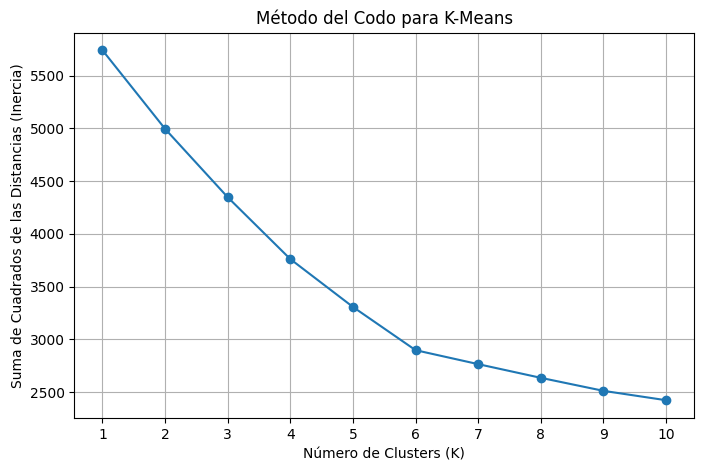


Calculando el Coeficiente de Silueta para diferentes K...
  - Para K=2, Coeficiente de Silueta: 0.1674
  - Para K=3, Coeficiente de Silueta: 0.2558
  - Para K=4, Coeficiente de Silueta: 0.1932
  - Para K=5, Coeficiente de Silueta: 0.1991
  - Para K=6, Coeficiente de Silueta: 0.2164
  - Para K=7, Coeficiente de Silueta: 0.2093
  - Para K=8, Coeficiente de Silueta: 0.2135
  - Para K=9, Coeficiente de Silueta: 0.1602
  - Para K=10, Coeficiente de Silueta: 0.1548


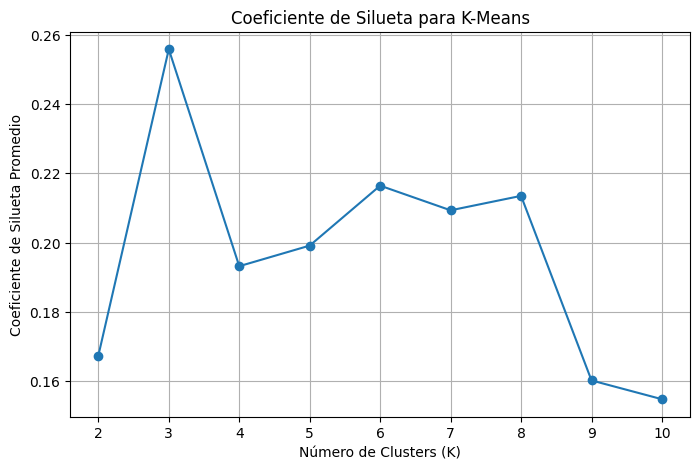


Análisis de K completado. Usa los gráficos para elegir el número óptimo de clusters.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

for col in df_processed.select_dtypes(include='bool').columns:
    df_processed[col] = df_processed[col].astype(int)

print("Iniciando la búsqueda del número óptimo de clusters (K)...")

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Cuadrados de las Distancias (Inercia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

silhouette_scores = []
k_range_silhouette = range(2, 11) 
print("\nCalculando el Coeficiente de Silueta para diferentes K...")
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_processed)
    silhouette_avg = silhouette_score(df_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"  - Para K={k}, Coeficiente de Silueta: {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

print("\nAnálisis de K completado. Usa los gráficos para elegir el número óptimo de clusters.")

## Modelo de Clustering 



Aplicando K-Means con K = 4 clusters...

Asignación de clusters completada. Número de recetas por cluster para K=4:
Cluster
0    493
1    101
2     50
3    303
Name: count, dtype: int64

Analizando las características de cada cluster (medias numéricas y distribuciones categóricas)...

Características Numéricas Promedio por Cluster (en escala original):
            calories  carbohydrate      sugar    protein  servings_numeric
Cluster                                                                   
0         336.289432     32.280406   6.058418  15.185680          4.689655
1        1131.734653     28.520891   5.719208  88.893663          3.346535
2         300.382000     48.992400  58.365800   7.374800          3.580000
3         363.218449     37.161221   6.107360  17.629307          1.531353

Distribución de Categorías y Tráfico por Cluster:

--- Columna 'category' por Cluster ---
category  Beverages  Breakfast  Chicken  Chicken Breast  Dessert  \
Cluster                            

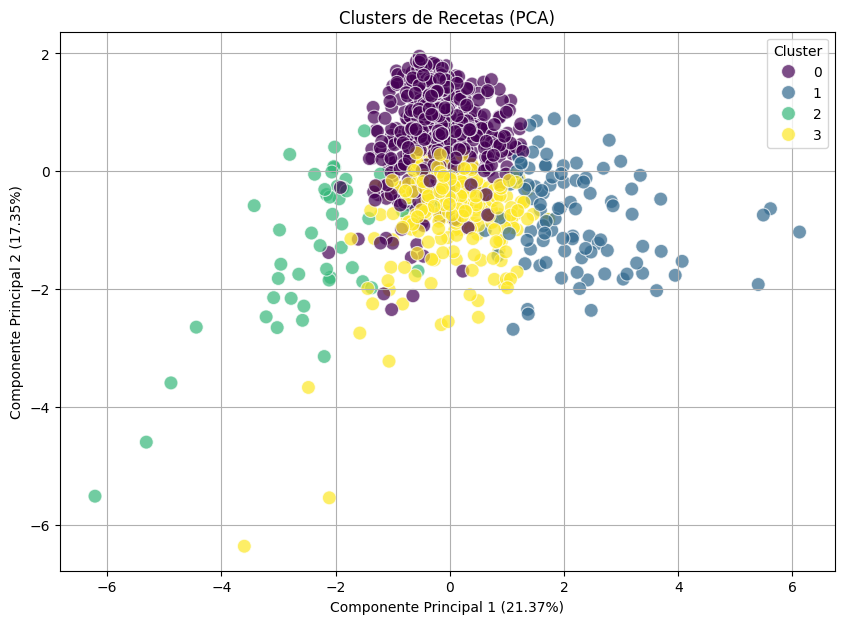


--- Traffic Distribution per Cluster (Corrected Check) ---

Traffic distribution for Cluster 0:
high_traffic
High    0.630832
NaN     0.369168
Name: proportion, dtype: float64

Traffic distribution for Cluster 1:
high_traffic
High    0.60396
NaN     0.39604
Name: proportion, dtype: float64

Traffic distribution for Cluster 2:
high_traffic
High    0.52
NaN     0.48
Name: proportion, dtype: float64

Traffic distribution for Cluster 3:
high_traffic
High    0.580858
NaN     0.419142
Name: proportion, dtype: float64

Análisis de características de clusters y visualización completada.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

num_clusters_elegido = 4 

print(f"\nAplicando K-Means con K = {num_clusters_elegido} clusters...")
kmeans_final = KMeans(n_clusters=num_clusters_elegido, random_state=42, n_init=10)
# Make sure df_processed here has the features you want to cluster on, properly scaled
# If df_processed is already scaled and contains relevant features for clustering
df_processed['Cluster'] = kmeans_final.fit_predict(df_processed)

print(f"\nAsignación de clusters completada. Número de recetas por cluster para K={num_clusters_elegido}:")
print(df_processed['Cluster'].value_counts().sort_index())

print("\nAnalizando las características de cada cluster (medias numéricas y distribuciones categóricas)...")

data_for_interpretation = data.copy() # Make sure 'data' DataFrame is loaded and available here
numerical_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
for col in numerical_cols:
    data_for_interpretation[col].fillna(data_for_interpretation[col].median(), inplace=True)
data_for_interpretation['servings_numeric'] = data_for_interpretation['servings'].astype(str).str.extract('(\d+)').astype(float)
data_for_interpretation['servings_numeric'].fillna(data_for_interpretation['servings_numeric'].median(), inplace=True)
data_for_interpretation['Cluster'] = df_processed['Cluster'] # Añadimos las etiquetas de cluster

print("\nCaracterísticas Numéricas Promedio por Cluster (en escala original):")
print(data_for_interpretation.groupby('Cluster')[['calories', 'carbohydrate', 'sugar', 'protein', 'servings_numeric']].mean())

print("\nDistribución de Categorías y Tráfico por Cluster:")
for cat_col in ['category', 'high_traffic', 'servings']:
    print(f"\n--- Columna '{cat_col}' por Cluster ---")
    if cat_col == 'high_traffic':
        # This part correctly handles the 'No_Traffic_Info_Original_NA' for display/analysis within the notebook
        temp_col_ht = data_for_interpretation[cat_col].fillna('No_Traffic_Info_Original_NA')
        print(pd.crosstab(data_for_interpretation['Cluster'], temp_col_ht, normalize='index').round(2))
    else:
        print(pd.crosstab(data_for_interpretation['Cluster'], data_for_interpretation[cat_col], normalize='index').round(2))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_processed.drop('Cluster', axis=1))
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_processed['Cluster'] # Añadimos la etiqueta del cluster al DataFrame PCA

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7, legend='full')
plt.title('Clusters de Recetas (PCA)')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# --- REPLACE YOUR EXISTING DEBUGGING CODE HERE WITH THIS ---
print("\n--- Traffic Distribution per Cluster (Corrected Check) ---")
# Use 'num_clusters_elegido' as defined in your code
for i in range(num_clusters_elegido):
    print(f"\nTraffic distribution for Cluster {i}:")
    # Use 'data_for_interpretation' which contains 'high_traffic' and 'Cluster'
    # Use dropna=False to explicitly count NaN/No_Traffic_Info values if they are still NaN
    print(data_for_interpretation[data_for_interpretation['Cluster'] == i]['high_traffic'].value_counts(normalize=True, dropna=False))
# --- END OF CORRECTED DEBUGGING CODE ---

print("\nAnálisis de características de clusters y visualización completada.")

In [8]:

data_for_interpretation_reset = data_for_interpretation.reset_index(drop=True)
df_pca_reset = df_pca.reset_index(drop=True)

df_for_dashboard = pd.concat([data_for_interpretation_reset, df_pca_reset[['PC1', 'PC2']]], axis=1)

if 'recipe' in df_for_dashboard.columns:
    df_for_dashboard = df_for_dashboard.drop('recipe', axis=1)

output_csv_path = 'recipes_clustered_for_dashboard.csv'
df_for_dashboard.to_csv(output_csv_path, index=False)

print(f"\nDatos con clusters y componentes PCA guardados como '{output_csv_path}'")


Datos con clusters y componentes PCA guardados como 'recipes_clustered_for_dashboard.csv'
